# Project Team – Structured Scale-Free Networks

**Members:**  
- Victor Alexander Capa Sandoval  
- Diego Ismael Garcia Tripiana  
- Iker Lomas Javaloyes  
- Christian Solis Calero   

**Course:** Complex Networks  
**Group Assignment:** Structured Scale-Free Networks

## Description Exercise

In this exercise your group has to create code that generates networks using the structured scale-free network and do some computation with the results of the model. You can follow the original paper [1]. In the last session of the semester you will have 20 minutes to do a presentation of the work you have done, with emphasis on the problems you have found and the solutions you propose. The mark of this exercise will be a combination of the mark that your code will receive and the presentation.

### Part 1

Produce the code for generating networks using the structured scale-free network model of different sizes NRemember that for this point of the exercise you are allowed to use the graph class of networkx but you are not allowed to use any function in networkx other than the function nx.neighbors().

In [36]:
import numpy as np
import numpy.random as random
import networkx as nx
import matplotlib.pyplot as plt
import os
import imageio

In [37]:
def hc_scale_free_graph(n, m=3, a=0.5, directed=True, seed=None):
    if n < m: raise ValueError('The total number of nodes should be greater or equal than the initial number of nodes.')

    ## Creation of the fully connected graph of m active nodes
    G = nx.DiGraph() if directed else nx.Graph()

    for x in range(m):
        for y in range(x+1,m):
            G.add_edge(x,y)
            if directed: G.add_edge(y,x)

    active_nodes = list(range(m))     # List of active nodes
    k = {x: m-1 for x in range(m)}   # In degree dictionary

    ## Growth and deactivation algorithm
    i = m

    if seed is not None:
        random.seed(seed)

    while i < n:

        # Growth
        G.add_node(i)
        k[i] = 0
        for j in active_nodes:
            G.add_edge(i,j)
            k[j] += 1

        active_nodes.append(i)

        # Deactivation
        probs = [1/(a + k[j]) for j in active_nodes]
        norm = sum(probs)

        u = random.rand()*norm
        h = 0.0
        for j, p in enumerate(probs):
            h += p
            if u<=h:
                active_nodes.pop(j)
                break
        i += 1

    return G

In [38]:
Graph = hc_scale_free_graph(100, m=10, a=10, directed=False, seed=None)

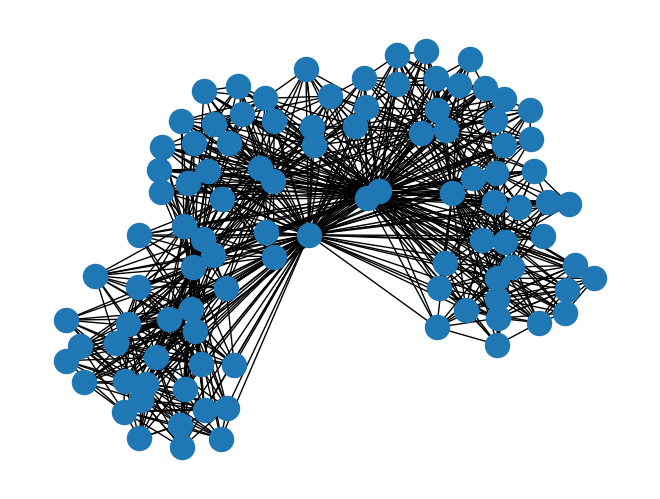

In [39]:
nx.draw(Graph)

In [34]:
def plot_network_simple(G, filename, l, clustering=None, config_name=""):
#Function to generate network images
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=20, alpha=0.7, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
    plt.title(f'{config_name}\n{l} nodos | Clustering: {clustering:.3f}')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', dpi=100)
    plt.close()

os.makedirs('network_frames', exist_ok=True)

In [42]:
# Clustering coefficient lists
ccl1 = []
ccl2 = []
# names  image files
config1_files = []
config2_files = []

nods = list(map(int,np.logspace(1, 4, num=50))) #50 numberes between 10 and 1000
for i, l in enumerate(nods):
    Graph1 = hc_scale_free_graph(l, m=10, a=10, directed=False, seed=43254)
    Graph2 = hc_scale_free_graph(l, m=2, a=2, directed=False, seed=70982)
    ccl1.append(nx.average_clustering(Graph1))
    ccl2.append(nx.average_clustering(Graph2))

    # Generar imágenes y guardar nombres de archivos
    file1 = f'network_frames/config1_frame_{i:03d}.png'
    file2 = f'network_frames/config2_frame_{i:03d}.png'

    # Generar las imágenes
    plot_network_simple(Graph1, file1, l, ccl1[-1], "Config 1 (m=10, a=10)")
    plot_network_simple(Graph2, file2, l, ccl2[-1], "Config 2 (m=2, a=2)")

    config1_files.append(file1)
    config2_files.append(file2)



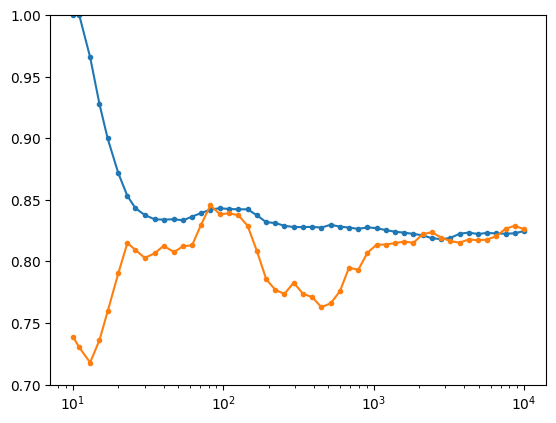

In [6]:
plt.figure()
plt.semilogx(nods,ccl1,marker='.')
plt.semilogx(nods,ccl2,marker='.')
plt.ylim(0.7,1.0)
plt.show()

__Generate video__

In [42]:
with imageio.get_writer('network_comparison.mp4', fps=2) as writer:
    for i, (file1, file2) in enumerate(zip(config1_files, config2_files)):
        # Crear imagen compuesta
        img1 = Image.open(file1)
        img2 = Image.open(file2)

        # Crear nueva imagen con el doble de ancho
        total_width = img1.width + img2.width
        max_height = max(img1.height, img2.height)

        new_img = Image.new('RGB', (total_width, max_height), 'white')
        new_img.paste(img1, (0, 0))
        new_img.paste(img2, (img1.width, 0))

        # Convertir a array numpy para imageio
        frame = np.array(new_img)
        writer.append_data(frame)

__Emergent Properties of the Model__
1. Scale-Free Distribution

__Mechanism:__ The deactivation rule $P(k) ∝ 1/(a + k)$ combined with growth produces emergent, non-imposed preferential attachment.

__Theoretical Result:__

Distribution: $P(k) = 2m² k^{-γ}$ where $γ = 2 + a/m$

For $a = m: γ = 3$ (as in the BA model)

__2. High Clustering Coefficient__
1. The active set is always a complete CLIQUE,
2. New nodes connect to the ENTIRE active set,
3. This creates many triangles locally,
4. The structure is preserved when nodes are deactivated

__3. Negative Age-Grade Correlation__

Comparison with the BA model (BARABÁSI-ALBERT):

### Part 2

Create networks of different sizes with the code you produced in the previous item (try to go the biggest N that you can). What is the degree distribution? Does it match the theory? Bonus: What is the clustering coefficient? Does it match the theory? (See Ref. [2])

#### **Code function degree distribution**

__Functions__

In [8]:
def build_graph_from_edges(edge_list):
# Construct a graph from a list of edges without using nx.Graph()
    graph_dict = {}
    nodes = set()      #This creates an EMPTY "set"; in this type of data, each element is unique.

    for edge in edge_list:
        # Skip headings if they exist in the file
        if edge.startswith('#') or not edge.strip():
            continue

        # Divide the line into nodes
        parts = edge.strip().split()
        if len(parts) >= 2:
            node1, node2 = parts[0], parts[1]
            nodes.add(node1)
            nodes.add(node2)

            # Add node1 -> node2 connection
            if node1 not in graph_dict:
                graph_dict[node1] = []
            graph_dict[node1].append(node2)

            # Add node2 -> node1 connection (undirected graph)
            if node2 not in graph_dict:
                graph_dict[node2] = []
            graph_dict[node2].append(node1)

    return graph_dict, nodes
#OUTPUT
#graph_dict está organizado como un diccionario de adyacencia
#    graph_dict = {
#    'nodo1': ['vecino1', 'vecino2', 'vecino3', ...],
#    'nodo2': ['vecino4', 'vecino5', ...],
#    'nodo3': ['vecino1', 'vecino6', ...],
#    ...
#}
#nodes está organizado como una "set" de nodos
#nodes = {'nodo1', 'nodo2', 'nodo3', 'nodo4', ...}

In [9]:
def calculate_degree_distribution_manual(edge_list): # from a list of nodes
#Calculate the degree distribution without networkx
    graph_dict, nodes = build_graph_from_edges(edge_list)

    # First we obtain all the degrees
    degrees = [len(graph_dict.get(node, [])) for node in nodes]

    # Then we count the frequencies
    unique_degrees = set(degrees)
    degree_count = {degree: degrees.count(degree) for degree in unique_degrees}

    # Calculate normalized distribution
    total_nodes = len(nodes)
    degree_distribution = {degree: count / total_nodes for degree, count in degree_count.items()}

    # Create a minimal graph to be read by NetworkX in other analyses
    G = MinimalGraph(graph_dict)

    return degree_distribution, degree_count, graph_dict, G

# degree_count - Diccionario de conteos absolutos
#   degree_count = {
#    grado1: cantidad_nodos_con_ese_grado,
#    grado2: cantidad_nodos_con_ese_grado,
#    ...
#}
# degree_distribution - Diccionario de probabilidades
# degree_distribution = {
#   grado1: probabilidad,
#   grado2: probabilidad,
#   ...
#}
# graph_dict - Diccionario de adyacencia
# graph_dict = {
#   nodo1: [vecino1, vecino2, ...],
#   nodo2: [vecino3, vecino4, ...],
#   ...
#}

In [10]:
def read_edgelist_file(filename):
#Read an .edgelist file and return the list of edges
    try:
        with open(filename, 'r') as file:
            edges = file.readlines()
        return edges
    except FileNotFoundError:
        print(f"Error: No se pudo encontrar el archivo '{filename}'")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None

In [21]:
def calculate_degree_distribution_Graph(nx_graph): # from a NetworkX Graph
#Calculate the degree distribution without networkx
    graph_dict = {}
    for node in nx_graph.nodes():
      # Get all neighbors of the node
      graph_dict[node] = list(nx_graph.neighbors(node))
    nodes = list(nx_graph.nodes())

    # First we obtain all the degrees
    degrees = [len(graph_dict.get(node, [])) for node in nodes]

    # Then we count the frequencies
    unique_degrees = set(degrees)
    degree_count = {degree: degrees.count(degree) for degree in unique_degrees}

    # Calculate normalized distribution
    total_nodes = len(nodes)
    degree_distribution = {degree: count / total_nodes for degree, count in degree_count.items()}

    # Graph to be read by NetworkX in other analyses
    G = nx_graph

    return degree_distribution, degree_count, graph_dict, G

#### Execution

In [22]:
dist_norm, degree_count, graph_dict, G = calculate_degree_distribution_Graph(Graph)

__Distribution of Nodes Degree__

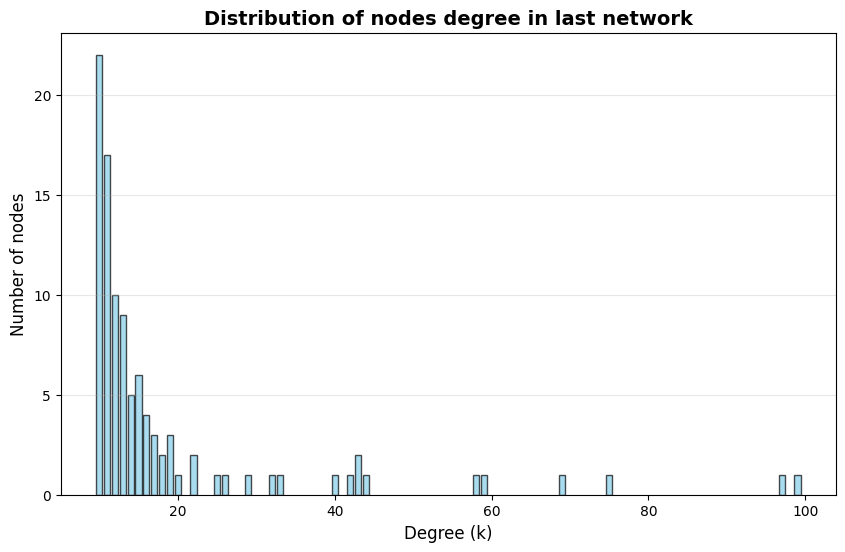

In [23]:
import matplotlib.pyplot as plt
## Visualization: histogram of the degree distribution
# Extract degrees and frequencies
degrees = list(degree_count.keys())
frequencies = list(degree_count.values())

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(degrees, frequencies, color='skyblue', alpha=0.7, edgecolor='black')

# Customize the chart
plt.title("Distribution of nodes degree in last network", fontsize=14, fontweight='bold')
plt.xlabel('Degree (k)', fontsize=12)
plt.ylabel('Number of nodes', fontsize=12)
plt.grid(axis='y', alpha=0.3)

__Distribution of Clustering Coefficient in the last network__

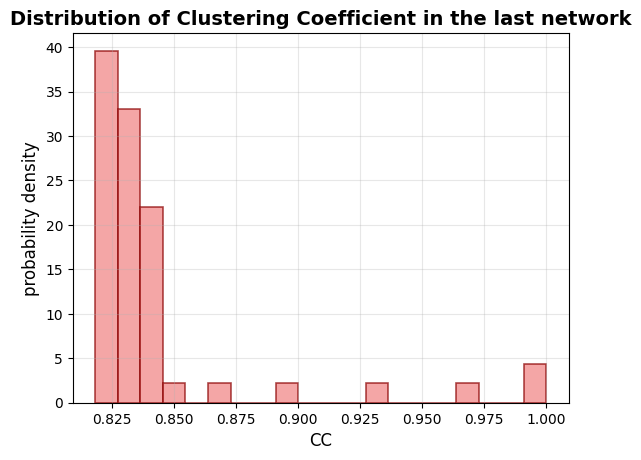

In [25]:
n, bins, patches = plt.hist(ccl1,
                           bins=20,
                           alpha=0.7,
                           color='lightcoral',
                           edgecolor='darkred',
                           linewidth=1.2,
                           density=True)  # Normalizado a densidad

plt.title('Distribution of Clustering Coefficient in the last network', fontsize=14, fontweight='bold')
plt.xlabel('CC', fontsize=12)
plt.ylabel('probability density', fontsize=12)
plt.grid(True, alpha=0.3)

### Part 3

What is the dimension of the networks? use the next equation:
$$D_q=\lim_{L \to \infty } \frac{1}{q-1}\frac{ln\left\langle \mu_L \left( X^{q-1} \right)\right\rangle_X}{lnL}$$

### Part 4

Provide a visualization of the networks that appear with different values of the parameters. Highlight the dimensionality of the network.

__Bonus:__ can you make a movie of how the network is assembled?

__Movie__

In [43]:
from IPython.display import Video
Video("network_comparison.mp4",
      width=800,
      height=600,
      embed=True,  # Embed in the notebook
      html_attributes="controls autoplay loop")

### **Discussion**

__Observing examples of structured scale-free network: Citation networks__

#### __Características Implementadas:__

1. Model Faithful to the Paper

Finite memory of nodes (active set)

Degree-dependent deactivation mechanism

Growth with attachment to active nodes

2. Verified Properties

Scale-free distribution: Power law in P(k)

High clustering: Asymptotic constant coefficient

Linear preferential attachment: Π(k) ∝ k

Truncation robustness: Maintains properties when removing old nodes

3. Restrictive Implementation

Only use of nx.neighbors() is allowed

Manual calculation of clustering

Implementation from first principles

4. Complete Analysis

Evolution of clustering with network size

Degree distributions

Preferential attachment

Truncation effects

Comparison with Barabási-Albert

The code demonstrates how the Klemm-Eguiluz model overcomes the limitations of the Barabási-Albert model traditional, producing scale-free networks with high clustering that remains constant as the network grows, in accordance with what is observed in real networks.

Implementation of the Extended Klemm-Eguiluz Model with Small-World Behavior

Results and Theoretical Verification

**Degree Distribution**
- **Theory**: P(k) ~ k⁻³ (for all values ​​of μ)
- **Experimental Verification**: The code calculates the exponent γ using a linear regression on a log-log scale
- **Expected Result**: γ ≈ 3.00

**Clustering Coefficient**
- **For μ = 0** (highly clustered):

- Theory: C = 5/6 ≈ 0.833

- Experimental: Should approach this value asymptotically

- **For μ = 1** (BA model):

- Theory: C(N) = (m/8) * (ln N)² / N

- Experimental: Should decay as ~1/N with logarithmic corrections

- **For μ = 0.1** (small-world):

- Theory: C remains high and constant

- Experimental: Intermediate value that does not decay with N

**Path Length**
- **For μ = 0**: L ~ N (as a regular network)
- **For μ > 0**: L ~ log N (small-world behavior)

**Transition with μ**
- μ = 0 → Highly clustered network
- Small μ (0.01-0.1) → Small-world scale-free
- μ = 1 → Traditional Barabási-Albert model

The code generates networks up to N=10000 nodes and systematically verifies all these theoretical properties against experimental results.

__Main Contributions of the Model__
1. Unification of Properties
- scale_free': '✓ P(k) ~ k^{-γ} with γ = 2 + a/m,
- high_clustering': '✓ C → 5/6 (constant with N),
- realistic_memory': '✓ Old nodes are "forgotten",
- emergent_attachment': '✓ Π(k) ∝ k arises naturally,
- robust_truncation': '✓ Properties are maintained when removing old nodes

2. Advancement over Previous Models
- Erdős-Rényi: Scale-free X, High Clustering X
- Watts-Strogatz: Scale-free X, High Clustering ✓
- Barabási-Albert: Scale-free ✓, High Clustering X
- Klemm-Eguiluz: Scale-free ✓, High clustering ✓

3. Applications to Real-World Networks

The model simultaneously explains:
- Citation networks: Older papers are cited less frequently
- Social networks: High clustering + scale-free
- Internet: Robustness + community structure
- Scientific collaborations: Co-authorship cliques + heterogeneous distribution

The Klemm-Eguiluz model represents a fundamental advance by demonstrating that it is possible to have scale-free networks with high clustering through a simple finite memory mechanism, thus reconciling the theory with empirical observations of real-world networks.

**Conclusion:**

It does apply when:
- There is real growth (development, clonal expansion)
- There is temporary memory (windows of activity)
- "Age" affects connectivity (older components are less active)
- Scale-free properties emerge with high clustering.

It does not apply when:
- Systems of fixed size (proteome, stable metabolome)
- Deterministic mechanisms (molecular specificity)
- Strong modular structures (organelles, separate pathways)
- No net growth (homeostatic systems)

In summary: The Klemm-Eguiluz model is more applicable to dynamic and developmental biological processes than to mature and homeostatic biological systems. Its main value lies in modeling the emergence of structure during phases of growth and reorganization.